Simple linear Regression allows us to underestand relationship between two contimous variables

## Example of simple liner Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

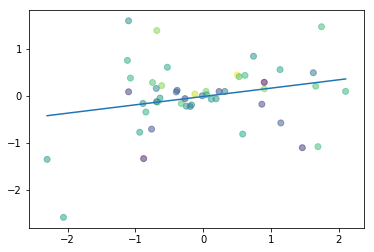

In [2]:
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.randn(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)))

plt.scatter(x, y, c = colors, alpha=0.5)
plt.show()

## Build a liner regression model with pytorch

In [3]:
x_value = [i for i in range(11)]
x_value

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
# convert to numpy
x_train = np.array(x_value, dtype=np.float32)

In [5]:
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [6]:
# y = 2x + 1
y_value = [2 * i + 1 for i in x_value]
y_value

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [7]:
y_train = np.array(y_value, dtype=np.float32)
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

## Building Model

In [8]:
import torch
from torch.autograd import Variable
import torch.nn as nn

### Create model
1. Liner model
    * True eqn : y = 2x + 1
2. Forward
    * Example
        * input x = 1
        * y = ?

In [9]:
# create class
class LinearRegressionModel(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [10]:
input_dim, output_dim = 1, 1
model = LinearRegressionModel(input_dim, output_dim)

In [11]:
# MSE Loss = Mean Squered Error

criteration = nn.MSELoss()

In [12]:
# Optimizer Class

learning_rate = 0.01

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

**Train Model**


In [13]:
a = time.time()
epochs = 100

for epoch in range(1, epochs+1):
    
    # Convert Numpy array to torch
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear Gradeients WRT
    optimizer.zero_grad()
    
    # Forward to get output 
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criteration(outputs, labels)
    
    # Getting Gradients w.r.t param
    loss.backward()
    
    # Updating Parm
    optimizer.step()
    
    print('Epocs', epoch, 'loss', loss.data[0])
    
print('Cpu Time', time.time() - a)
del a

Epocs 1 loss 64.36959838867188
Epocs 2 loss 63.285911560058594
Epocs 3 loss 62.2116813659668
Epocs 4 loss 61.147056579589844
Epocs 5 loss 60.092185974121094
Epocs 6 loss 59.0472297668457
Epocs 7 loss 58.012325286865234
Epocs 8 loss 56.987606048583984
Epocs 9 loss 55.97321701049805
Epocs 10 loss 54.969276428222656
Epocs 11 loss 53.975894927978516
Epocs 12 loss 52.99319839477539
Epocs 13 loss 52.02128601074219
Epocs 14 loss 51.06025314331055
Epocs 15 loss 50.11019515991211
Epocs 16 loss 49.17119216918945
Epocs 17 loss 48.24332046508789
Epocs 18 loss 47.32664489746094
Epocs 19 loss 46.42123031616211
Epocs 20 loss 45.5271110534668
Epocs 21 loss 44.644351959228516
Epocs 22 loss 43.77298355102539
Epocs 23 loss 42.913028717041016
Epocs 24 loss 42.064517974853516
Epocs 25 loss 41.22746276855469
Epocs 26 loss 40.40187072753906
Epocs 27 loss 39.587745666503906
Epocs 28 loss 38.78507614135742
Epocs 29 loss 37.99385070800781
Epocs 30 loss 37.214054107666016
Epocs 31 loss 36.44566345214844
Epocs 32

In [14]:
# Compare data
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[  0.73339951],
       [  2.35265732],
       [  3.97191477],
       [  5.5911727 ],
       [  7.21043015],
       [  8.82968807],
       [ 10.448946  ],
       [ 12.06820297],
       [ 13.6874609 ],
       [ 15.30671883],
       [ 16.9259758 ]], dtype=float32)

In [15]:
y_train

array([[  1.],
       [  3.],
       [  5.],
       [  7.],
       [  9.],
       [ 11.],
       [ 13.],
       [ 15.],
       [ 17.],
       [ 19.],
       [ 21.]], dtype=float32)

**Save model**


In [16]:
torch.save(model.state_dict(), '03 Linear Regression with PyTorch.pkl')

**Load Model**

In [17]:
model.load_state_dict(torch.load("03 Linear Regression with PyTorch.pkl"))

# Use GPU

In [18]:
# create class
class LinearRegressionModel(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

input_dim, output_dim = 1, 1
model = LinearRegressionModel(input_dim, output_dim)

In [19]:
# Everithing on the CPU is same as GPU
# But there is some change Let's see

if torch.cuda.is_available():
    print('Cuda Available')
    model.cuda()

Cuda Available


In [20]:
# MSE Loss = Mean Squered Error

criteration = nn.MSELoss()

# Optimizer Class

learning_rate = 0.01

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [21]:
a = time.time()
if torch.cuda.is_available():
    print('Cuda Available')

    epochs = 100

    for epoch in range(1, epochs+1):

        # Convert Numpy array to torch
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())

        # Clear Gradeients WRT
        optimizer.zero_grad()

        # Forward to get output 
        outputs = model(inputs)

        # Calculate Loss
        loss = criteration(outputs, labels)

        # Getting Gradients w.r.t param
        loss.backward()

        # Updating Parm
        optimizer.step()

        print('Epocs', epoch, 'loss', loss.data[0])
        
print('Gpu Time', time.time() - a)

Cuda Available
Epocs 1 loss 156.33799743652344
Epocs 2 loss 154.64662170410156
Epocs 3 loss 152.96469116210938
Epocs 4 loss 151.29234313964844
Epocs 5 loss 149.6297607421875
Epocs 6 loss 147.97711181640625
Epocs 7 loss 146.3345184326172
Epocs 8 loss 144.7021026611328
Epocs 9 loss 143.0800323486328
Epocs 10 loss 141.4684600830078
Epocs 11 loss 139.86749267578125
Epocs 12 loss 138.27725219726562
Epocs 13 loss 136.69786071777344
Epocs 14 loss 135.12940979003906
Epocs 15 loss 133.57205200195312
Epocs 16 loss 132.02586364746094
Epocs 17 loss 130.49093627929688
Epocs 18 loss 128.9673614501953
Epocs 19 loss 127.45520782470703
Epocs 20 loss 125.95458984375
Epocs 21 loss 124.46553039550781
Epocs 22 loss 122.98812866210938
Epocs 23 loss 121.52240753173828
Epocs 24 loss 120.0684585571289
Epocs 25 loss 118.62628936767578
Epocs 26 loss 117.19595336914062
Epocs 27 loss 115.77749633789062
Epocs 28 loss 114.37094116210938
Epocs 29 loss 112.9762954711914
Epocs 30 loss 111.59359741210938
Epocs 31 loss 1